### CASE STUDY

Context:

You work for a marketing agency that specialises in advertising analytics. Your client is a consumer goods company that wants to understand the impact of their advertising efforts on product sales. They collected data on advertising expenditures through different channels (TV, radio, and newspaper) and corresponding sales figures. Your task is to analyse the dataset and build regression models to predict future sales based on advertising spending.


Tasks:

1. Load the dataset and describe the data (number of points, number missing values, etc.).
2. Create scatter plots to visualize the relationships between each advertising channel (TV, radio, newspaper) and sales.
3. For each of the advertising channels, build a simple linear regression model to predict sales based only on that channel. Interpret the regression coefficients and evaluate the model's performance using the R-squared method.
4. Which of the three advertising channels explains better by itself the level of sales?  
5. Build a multivariate linear regression model that includes all three advertising channels (TV, radio, newspaper) as independent variables to predict sales and evaluate the model's performance using the R-squared method. Is multivariate linear regression better than any of the models using only one variable?
6. Use the trained multivariate regression models to predict sales for new data points (predict datasheet). Which of the scenarios proposed in the datasheet forecasts a higher level of sales? 


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



1. Load the dataset and describe the data (number of points, number missing values, etc.).

In [61]:
df = pd.read_excel('advertising_data.xlsx')

In [62]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [63]:
df.shape

(200, 4)

It seems there are 200 data points with 4 columns

In [64]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is missing values in this dataset

2. Create scatter plots to visualize the relationships between each advertising channel (TV, radio, newspaper) and sales.


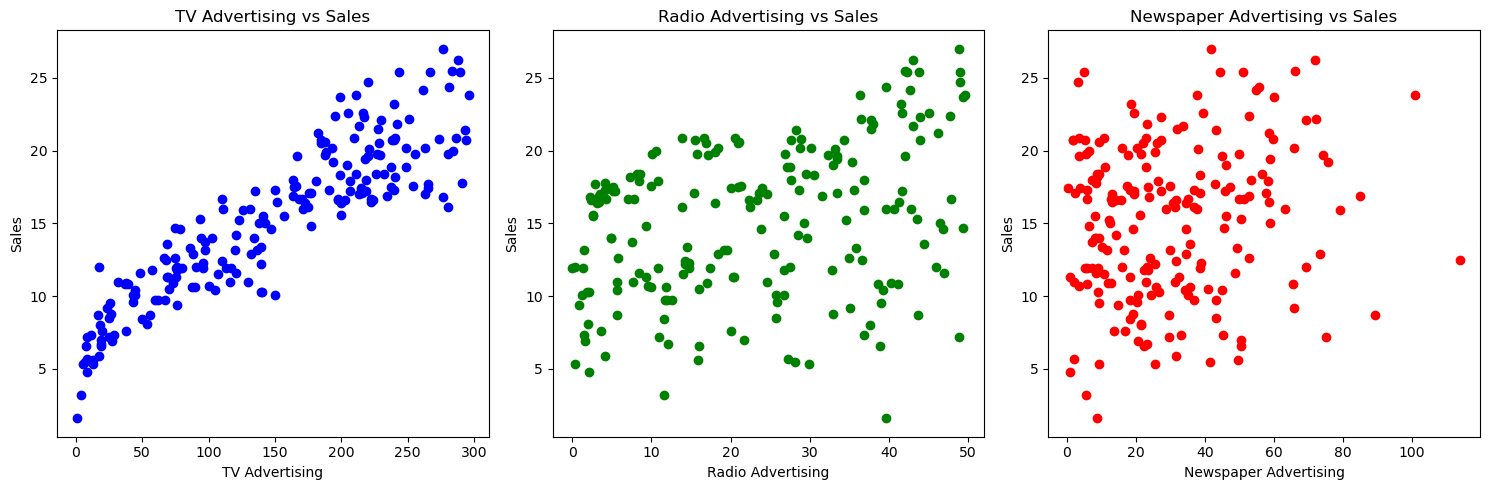

In [65]:


# Create scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='green')
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='red')
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

3. For each of the advertising channels, build a simple linear regression model to predict sales based
only on that channel. Interpret the regression coefficients and evaluate the model's performance
using the R-squared method.

In [66]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


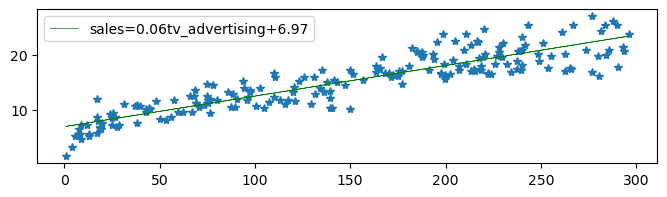

The equation for this model is: sales=0.06tv_advertising+6.97


In [67]:
tv_advertising = df.TV.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(tv_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'tv_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(tv_advertising)

plt.figure(figsize=(8,2))
plt.plot(tv_advertising,sales, '*')
plt.plot(tv_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

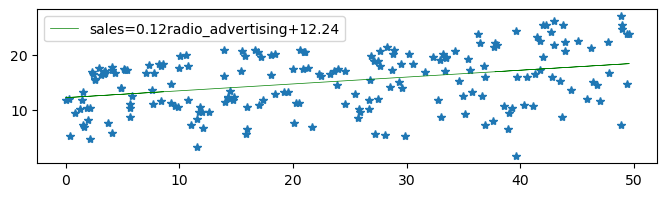

The equation for this model is: sales=0.12radio_advertising+12.24


In [68]:
radio_advertising = df.Radio.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(radio_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'radio_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(radio_advertising)

plt.figure(figsize=(8,2))
plt.plot(radio_advertising,sales, '*')
plt.plot(radio_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

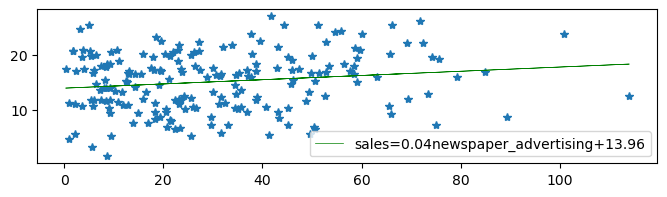

The equation for this model is: sales=0.04newspaper_advertising+13.96


In [69]:
newspaper_advertising = df.Newspaper.values.reshape(-1, 1)
sales = df.Sales.values

my_model = LinearRegression().fit(newspaper_advertising,sales)
a = my_model.coef_[0]
b = my_model.intercept_

text= 'sales='+str(round(a,2))+'newspaper_advertising''+'+str(round(b,2))

sales_predict = my_model.predict(newspaper_advertising)

plt.figure(figsize=(8,2))
plt.plot(newspaper_advertising,sales, '*')
plt.plot(newspaper_advertising,sales_predict, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)

In [70]:

sales_pred = my_model.predict(newspaper_advertising)

# Calculate R-squared value
r_squared = r2_score(sales, sales_pred)

print(r_squared)

0.024951369862864836


In [71]:
sales_pred = my_model.predict(radio_advertising)

# Calculate R-squared value
r_squared = r2_score(sales, sales_pred)

print(r_squared)

0.06089362201322823


In [72]:
sales_pred = my_model.predict(tv_advertising)

# Calculate R-squared value
r_squared = r2_score(sales, sales_pred)

print(r_squared)

0.017183522824260167


4. Which of the three advertising channels explains better by itself the level of sales?

Ans. The advertising channel with the highest R-squared value is radio advertising (0.0609), indicating that radio advertising explains the level of sales better by itself compared to TV advertising and newspaper advertising. Therefore, radio advertising is the strongest predictor of sales among the three advertising channels when considered individually.

5. Build a multivariate linear regression model that includes all three advertising channels (TV, radio,
newspaper) as independent variables to predict sales and evaluate the model's performance using
the R-squared method. Is multivariate linear regression better than any of the models using only one
variable?

In [73]:
# Prepare the features and target variable
X = df[['TV', 'Radio', 'Newspaper']]  # Features (advertising channels)
y = df['Sales']                        # Target variable (Sales)

# Build multivariate linear regression model
multivariate_model = LinearRegression()
multivariate_model.fit(X, y)

# Make predictions
y_pred = multivariate_model.predict(X)

# Evaluate the model
r_squared_multivariate = r2_score(y, y_pred)
print("R-squared for Multivariate Linear Regression:", r_squared_multivariate)


R-squared for Multivariate Linear Regression: 0.9025912899684558


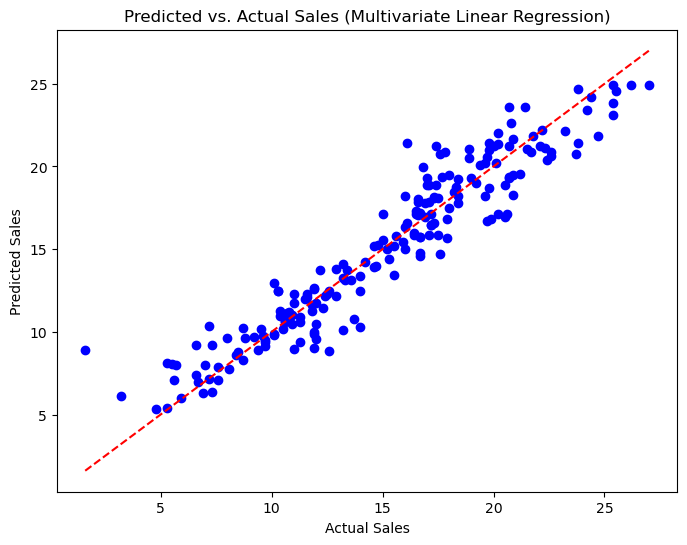

In [74]:
# Plot predicted vs. actual sales for multivariate linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')  # Plotting the ideal line (y = x)
plt.title('Predicted vs. Actual Sales (Multivariate Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [50]:
# Print the coefficients and intercept of the multivariate linear regression model
print("Coefficients:", multivariate_model.coef_)
print("Intercept:", multivariate_model.intercept_)


Coefficients: [0.05444578 0.10700123 0.00033566]
Intercept: 4.625124078808653


 So, the model is
$ Y = 0.05444578 X1 + 0.10700123 X2 +0.00033566 X3 +4.625124078808653$

6. Use the trained multivariate regression models to predict sales for new data points (predict
datasheet). Which of the scenarios proposed in the datasheet forecasts a higher level of sales?

In [81]:
# Provided equation coefficients
coef_tv = 0.05444578
coef_radio = 0.10700123
coef_newspaper = 0.00033566
intercept = 4.625124078808653

# Predict datasheet with scenarios
predict_datasheet = {
    'TV': [200, 300, 400],  # Example values for TV advertising
    'Radio': [50, 60, 70],   # Example values for radio advertising
    'Newspaper': [20, 30, 40]  # Example values for newspaper advertising
}

# Calculate predicted sales for each scenario
predicted_sales = []
for tv, radio, newspaper in zip(predict_datasheet['TV'], predict_datasheet['Radio'], predict_datasheet['Newspaper']):
    sales = coef_tv * tv + coef_radio * radio + coef_newspaper * newspaper + intercept
    predicted_sales.append(sales)

# Print the predicted sales for each scenario
for i, sales in enumerate(predicted_sales):
    print(f"Scenario {i+1}: Predicted Sales = {sales}")


Scenario 1: Predicted Sales = 20.871054778808652
Scenario 2: Predicted Sales = 27.389001678808654
Scenario 3: Predicted Sales = 33.90694857880865
